### Applying LDA on a feature set for classfication

In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

### Load, Explore and Pre-process Data

https://scikit-learn.org/stable/modules/generated/sklearn.datasets.load_wine.html

In [2]:
from sklearn.datasets import load_wine

wine = load_wine()

In [3]:
print(wine.DESCR)

.. _wine_dataset:

Wine recognition dataset
------------------------

**Data Set Characteristics:**

    :Number of Instances: 178 (50 in each of three classes)
    :Number of Attributes: 13 numeric, predictive attributes and the class
    :Attribute Information:
 		- Alcohol
 		- Malic acid
 		- Ash
		- Alcalinity of ash  
 		- Magnesium
		- Total phenols
 		- Flavanoids
 		- Nonflavanoid phenols
 		- Proanthocyanins
		- Color intensity
 		- Hue
 		- OD280/OD315 of diluted wines
 		- Proline

    - class:
            - class_0
            - class_1
            - class_2
		
    :Summary Statistics:
    
    ============================= ==== ===== ======= =====
                                   Min   Max   Mean     SD
    ============================= ==== ===== ======= =====
    Alcohol:                      11.0  14.8    13.0   0.8
    Malic Acid:                   0.74  5.80    2.34  1.12
    Ash:                          1.36  3.23    2.36  0.27
    Alcalinity of Ash:            1

In [4]:
X = pd.DataFrame(data = wine.data, columns = wine.feature_names)

In [5]:
X.shape

(178, 13)

In [7]:
X.sample(5)

,alcohol,malic_acid,ash,alcalinity_of_ash,magnesium,total_phenols,flavanoids,nonflavanoid_phenols,proanthocyanins,color_intensity,hue,od280/od315_of_diluted_wines,proline
136,12.25,4.72,2.54,21.0,89.0,1.38,0.47,0.53,0.80,3.85,0.75,1.27,720.0
61,12.64,1.36,2.02,16.8,100.0,2.02,1.41,0.53,0.62,5.75,0.98,1.59,450.0
41,13.41,3.84,2.12,18.8,90.0,2.45,2.68,0.27,1.48,4.28,0.91,3.00,1035.0
119,12.00,3.43,2.00,19.0,87.0,2.00,1.64,0.37,1.87,1.28,0.93,3.05,564.0
56,14.22,1.70,2.30,16.3,118.0,3.20,3.00,0.26,2.03,6.38,0.94,3.31,970.0


In [17]:
target_names = wine.target_names

target_names

array(['class_0', 'class_1', 'class_2'], dtype='<U7')

In [10]:
y = wine.target

y.shape

(178,)

In [11]:
y

array([0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 2, 2,
       2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2,
       2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2,
       2, 2])

In [12]:
X.dtypes

alcohol                         float64
malic_acid                      float64
ash                             float64
alcalinity_of_ash               float64
magnesium                       float64
total_phenols                   float64
flavanoids                      float64
nonflavanoid_phenols            float64
proanthocyanins                 float64
color_intensity                 float64
hue                             float64
od280/od315_of_diluted_wines    float64
proline                         float64
dtype: object

Text(0, 0.5, 'non flavanoid phenols')

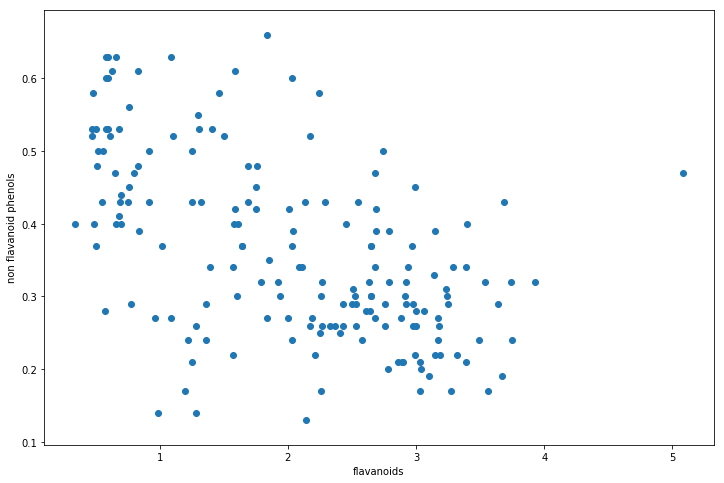

In [13]:
fig, ax = plt.subplots(figsize=(12, 8))

plt.scatter(X['flavanoids'], X['nonflavanoid_phenols'])

plt.xlabel('flavanoids')
plt.ylabel('non flavanoid phenols')

Text(0, 0.5, 'wine type')

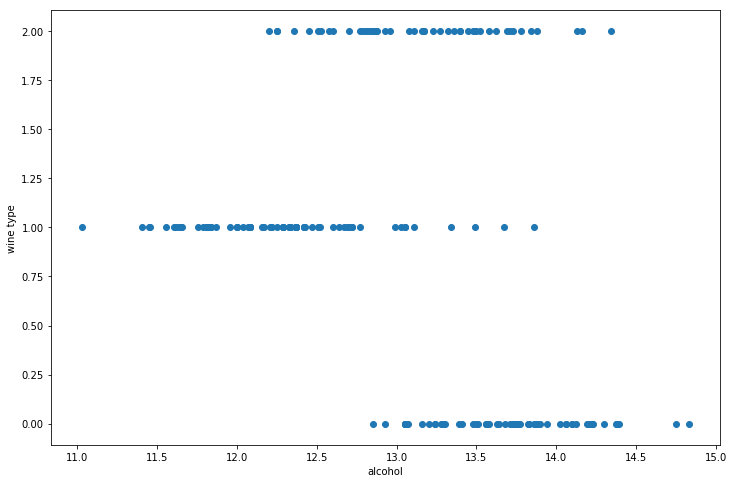

In [14]:
fig, ax = plt.subplots(figsize = (12, 8))

plt.scatter(X['alcohol'], pd.DataFrame(data = y))

plt.xlabel('alcohol')
plt.ylabel('wine type')

In [15]:
wine_corr = X.corr()

wine_corr

,alcohol,malic_acid,ash,alcalinity_of_ash,magnesium,total_phenols,flavanoids,nonflavanoid_phenols,proanthocyanins,color_intensity,hue,od280/od315_of_diluted_wines,proline
alcohol,1.000000,0.094397,0.211545,-0.310235,0.270798,0.289101,0.236815,-0.155929,0.136698,0.546364,-0.071747,0.072343,0.643720
malic_acid,0.094397,1.000000,0.164045,0.288500,-0.054575,-0.335167,-0.411007,0.292977,-0.220746,0.248985,-0.561296,-0.368710,-0.192011
ash,0.211545,0.164045,1.000000,0.443367,0.286587,0.128980,0.115077,0.186230,0.009652,0.258887,-0.074667,0.003911,0.223626
alcalinity_of_ash,-0.310235,0.288500,0.443367,1.000000,-0.083333,-0.321113,-0.351370,0.361922,-0.197327,0.018732,-0.273955,-0.276769,-0.440597
magnesium,0.270798,-0.054575,0.286587,-0.083333,1.000000,0.214401,0.195784,-0.256294,0.236441,0.199950,0.055398,0.066004,0.393351
total_phenols,0.289101,-0.335167,0.128980,-0.321113,0.214401,1.000000,0.864564,-0.449935,0.612413,-0.055136,0.433681,0.699949,0.498115
flavanoids,0.236815,-0.411007,0.115077,-0.351370,0.195784,0.864564,1.000000,-0.537900,0.652692,-0.172379,0.543479,0.787194,0.494193
nonflavanoid_phenols,-0.155929,0.292977,0.186230,0.361922,-0.256294,-0.449935,-0.537900,1.000000,-0.365845,0.139057,-0.262640,-0.503270,-0.311385
proanthocyanins,0.136698,-0.220746,0.009652,-0.197327,0.236441,0.612413,0.652692,-0.365845,1.000000,-0.025250,0.295544,0.519067,0.330417
color_intensity,0.546364,0.248985,0.258887,0.018732,0.199950,-0.055136,-0.172379,0.139057,-0.025250,1.000000,-0.521813,-0.428815,0.316100


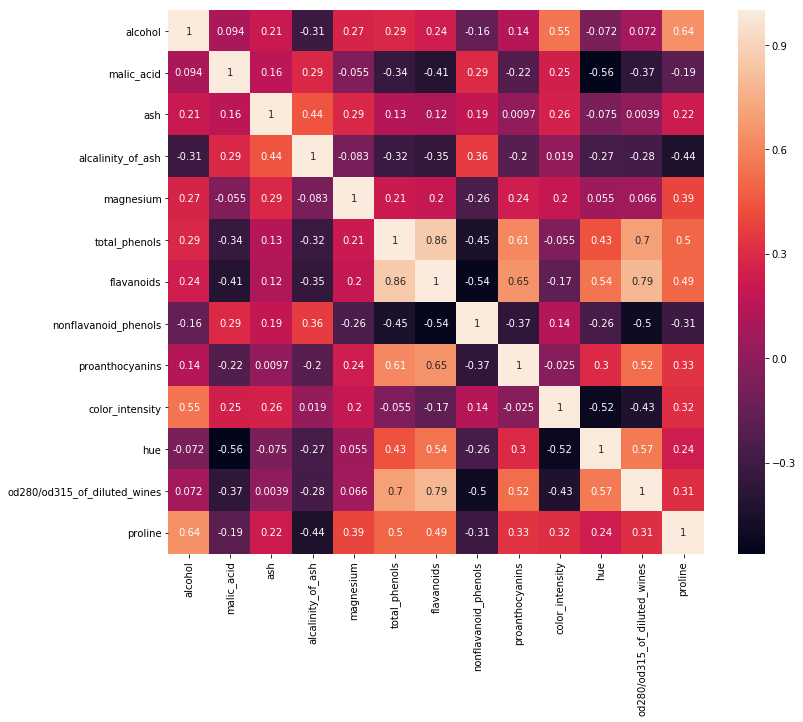

In [16]:
fig, ax = plt.subplots(figsize=(12, 10))

sns.heatmap(wine_corr, annot = True)

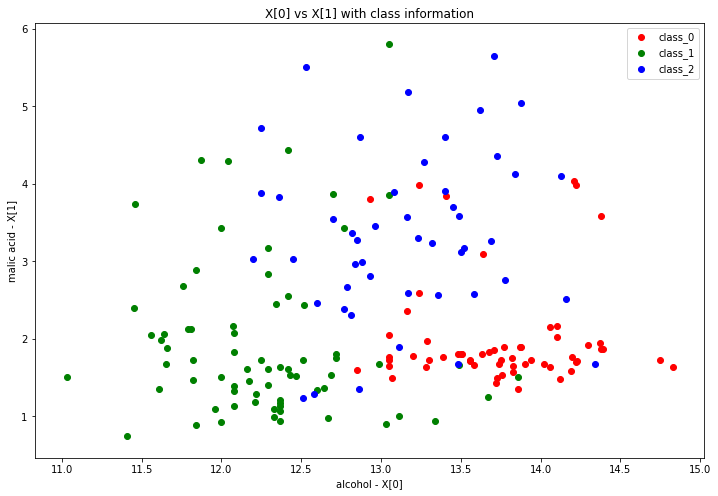

In [18]:
fig, ax = plt.subplots(figsize=(12, 8))

x = np.array(X)

for c, i, target_name in zip("rgb", [0, 1, 2], target_names):
    
    plt.scatter(x[y == i, 0], x[y == i, 1], c = c, label = target_name)
    
plt.title('X[0] vs X[1] with class information')
plt.xlabel('alcohol - X[0]')
plt.ylabel('malic acid - X[1]')  

plt.legend()
plt.show()

### Perform LDA

https://scikit-learn.org/0.16/modules/generated/sklearn.lda.LDA.html

In [19]:
from sklearn.discriminant_analysis import LinearDiscriminantAnalysis as LDA

lda = LDA(n_components = 2)

In [20]:
X_new = lda.fit_transform(X, y)

In [21]:
lda.explained_variance_ratio_

array([0.68747889, 0.31252111])

In [22]:
X_new.shape

(178, 2)

In [23]:
X_new = pd.DataFrame(X_new)

X_new.head()

,0,1
0,-4.700244,1.979138
1,-4.301958,1.170413
2,-3.420720,1.429101
3,-4.205754,4.002871
4,-1.509982,0.451224


## Visualize results

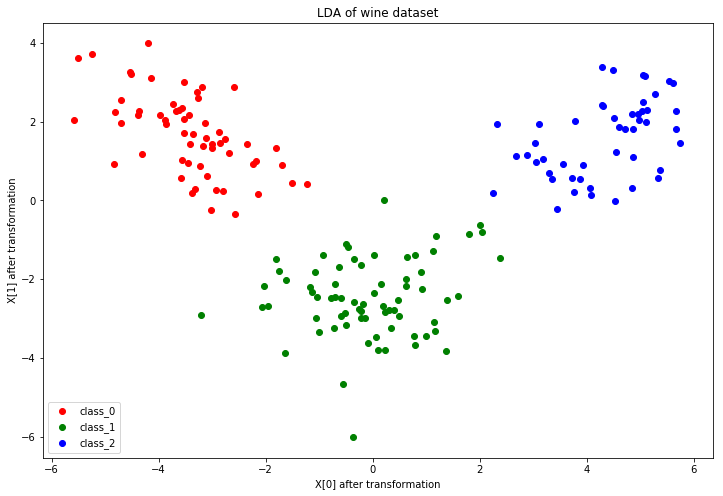

In [24]:
fig, ax = plt.subplots(figsize = (12, 8))

x_new = np.array(X_new)

for c, i, target_name in zip("rgb", [0, 1, 2], target_names):
    
    plt.scatter( x_new[y == i, 0], x_new[y == i, 1], c = c, label = target_name)
    

plt.title('LDA of wine dataset')
plt.xlabel('X[0] after transformation')
plt.ylabel('X[1] after transformation');

plt.legend()
plt.show()

### Correlations

In [25]:
lda_corr = X_new.corr()

lda_corr

,0,1
0,1.000000e+00,4.376151e-16
1,4.376151e-16,1.000000e+00
